In [2]:
import pandas as pd
exchange_rates=pd.read_csv("euro-daily-hist_1999_2020.csv")
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
exchange_rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
euro_to_dollar=exchange_rates[["Time","US_dollar"]].copy()

In [5]:
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.2184     1
1.0809     1
1.0328     1
1.2159     1
1.0018     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
euro_to_dollar=euro_to_dollar[euro_to_dollar["US_dollar"]!="-"]
euro_to_dollar["US_dollar"]=euro_to_dollar["US_dollar"].astype("float")

In [7]:
euro_to_dollar["rolling_mean"]=euro_to_dollar["US_dollar"].rolling(30).mean()

In [8]:
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline
euro06_10=euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year>=2006) & (euro_to_dollar["Time"].dt.year<=2010)]
euro11_15=euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year>=2011) & (euro_to_dollar["Time"].dt.year<=2015)]
euro19_21=euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year>=2019) & (euro_to_dollar["Time"].dt.year<=2021)]
euro06_10["rolling_mean"]=euro06_10["US_dollar"].rolling(30).mean()
euro11_15["rolling_mean"]=euro11_15["US_dollar"].rolling(30).mean()
euro19_21["rolling_mean"]=euro19_21["US_dollar"].rolling(30).mean()


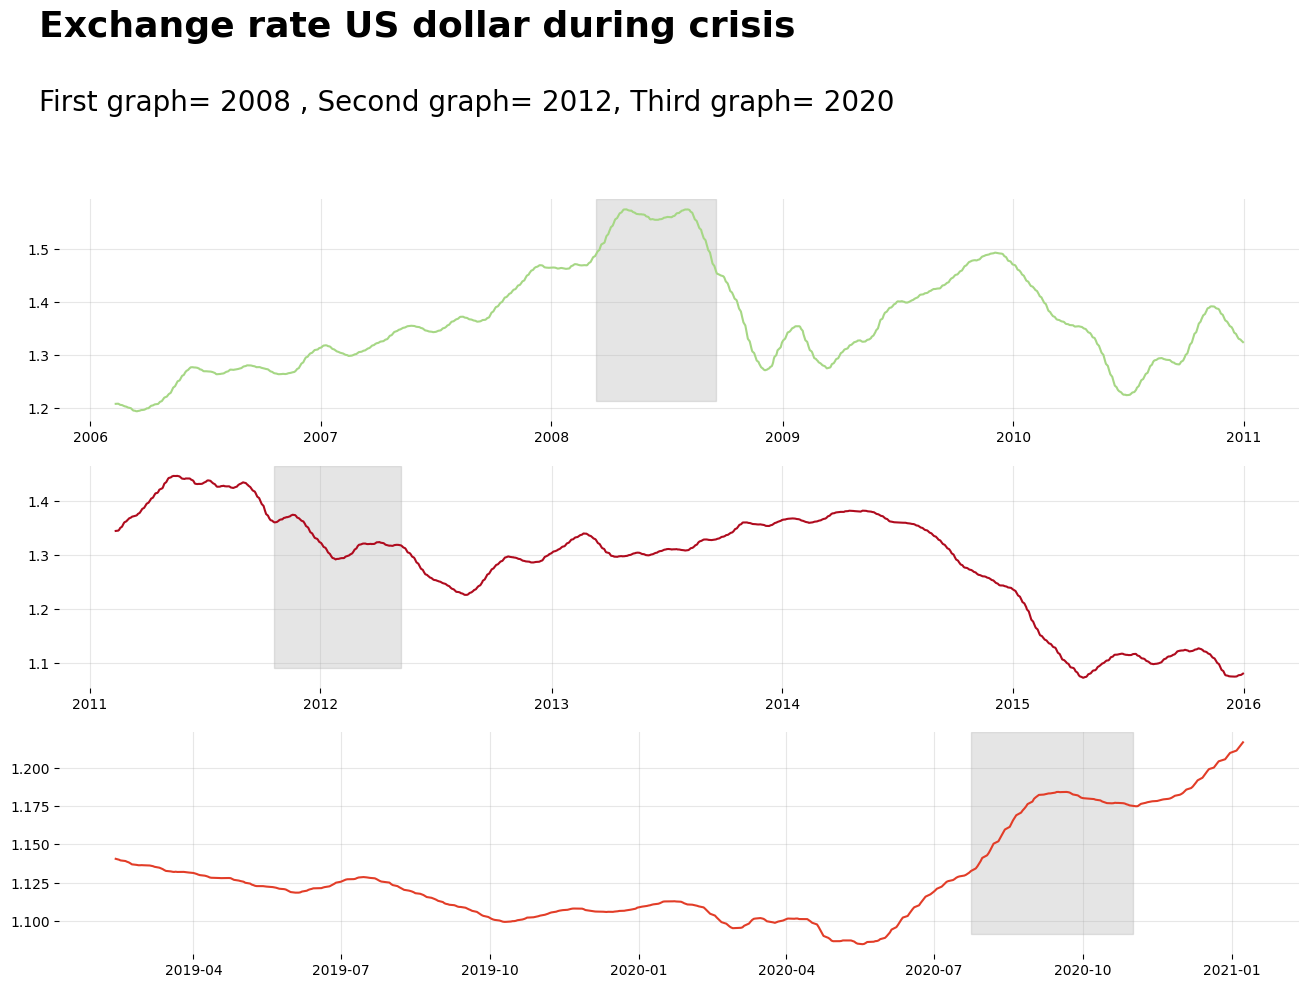

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(16,10))
axes=[ax1,ax2,ax3]
for i in axes:
    for location in ["top","left","bottom","right"]:
        i.spines[location].set_visible(False)
ax1.text(732230.0,1.90, s="Exchange rate Euro/US dollar during crisis", weight="bold", size=26)  
ax1.text(732230.0,1.76, s="First graph= 2008 , Second graph= 2012, Third graph= 2020", size=20)    
ax1.plot(euro06_10["Time"],euro06_10["rolling_mean"], color='#A6D785')
ax2.plot(euro11_15["Time"],euro11_15["rolling_mean"],  color='#af0b1e')
ax3.plot(euro19_21["Time"],euro19_21["rolling_mean"],  color='#e23d28')
ax1.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.2, color='grey')
ax2.axvspan(xmin=734430.0, xmax=734630.0, ymin=0.09,
           alpha=0.2, color='grey')
ax3.axvspan(xmin=737630.0, xmax=737730.0, ymin=0.09,
           alpha=0.2, color='grey')
ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)
ax3.grid(alpha=0.3)
plt.show()


The graphs show the exchange rate Euro/US dollar during the crisis. The first one about the 2008 crisis, the second one about the sovereign debt crisis of some European countries, the third one about Covid 19. 